# Time Series Data Visualization in Python

This notebook walks through several data visualization techniques for time-oriented data using Python, Pandas and Matplotlib: 

- Line Plots.
- Histograms and Density Plots.
- Box and Whisker Plots.
- Heat Maps.
- Lag Plots or Scatter Plots.
- Autocorrelation Plots.
- Moving Averages.

## Libraries and Import Data

In [1]:
import pandas as pd
from pandas import TimeGrouper
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# let's use a better styling that default
plt.style.use('fivethirtyeight')

In [2]:
series = pd.Series.from_csv('data/sample/daily-min-temperatures.csv', header=0)
print(series.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


## 1. Time Series Line Plot

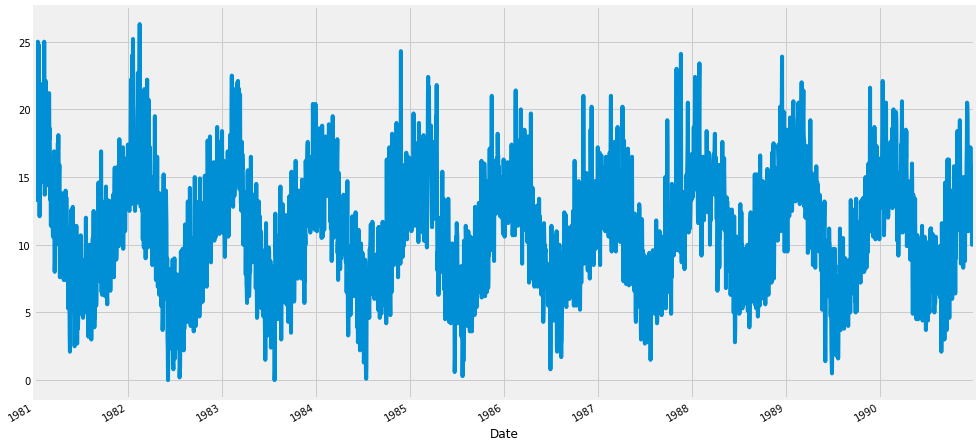

In [3]:
fig = plt.figure(figsize=(15,8))
series.plot()
plt.show()

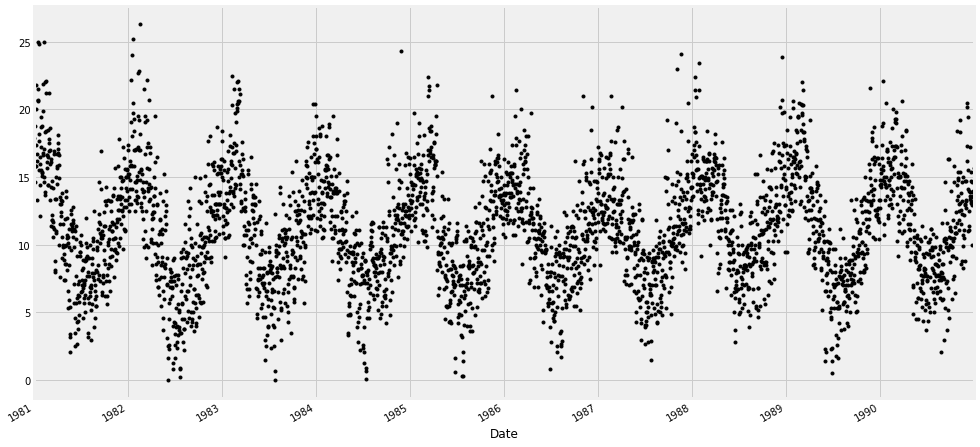

In [4]:
fig = plt.figure(figsize=(15,8))
series.plot(style='k.')
plt.show()

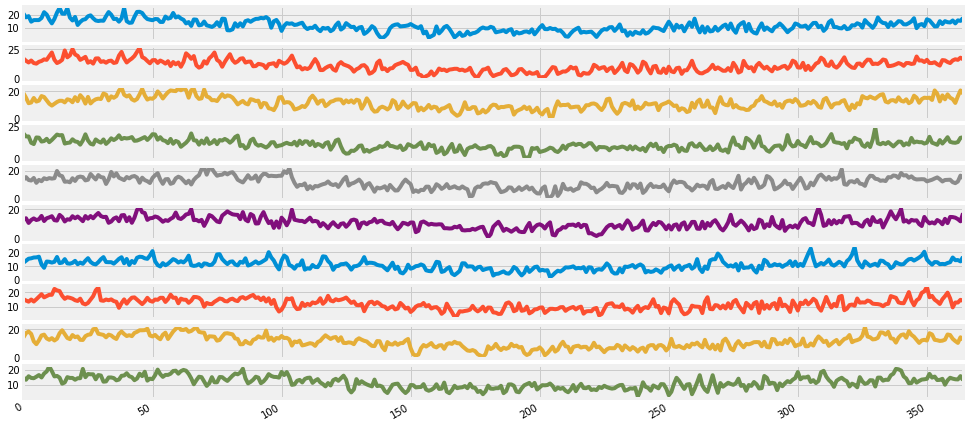

In [5]:
groups = series.groupby(TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False, figsize=(15,8))
plt.show()

## 2. Time Series Histogram and Density Plots

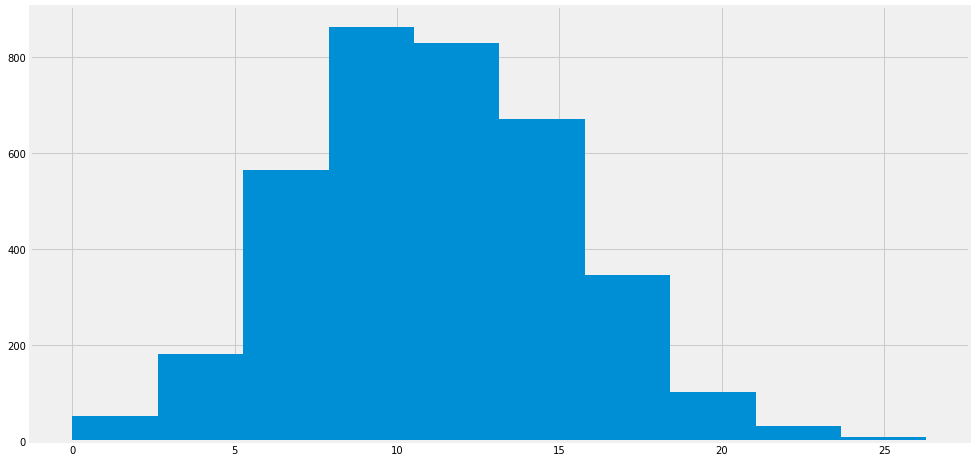

In [6]:
fig = plt.figure(figsize=(15,8))
series.hist()
plt.show()

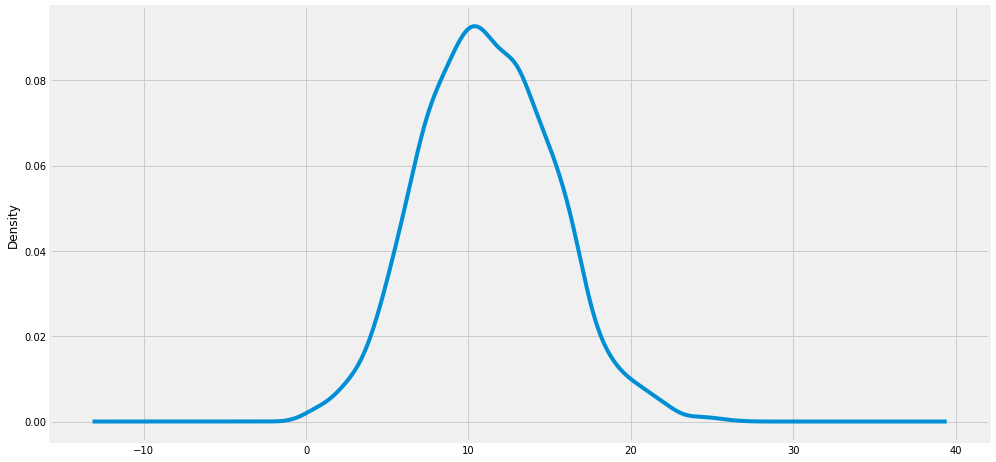

In [7]:
fig = plt.figure(figsize=(15,8))
series.plot(kind='kde')
plt.show()


## 3. Time Series Box and Whisker Plots by Interval

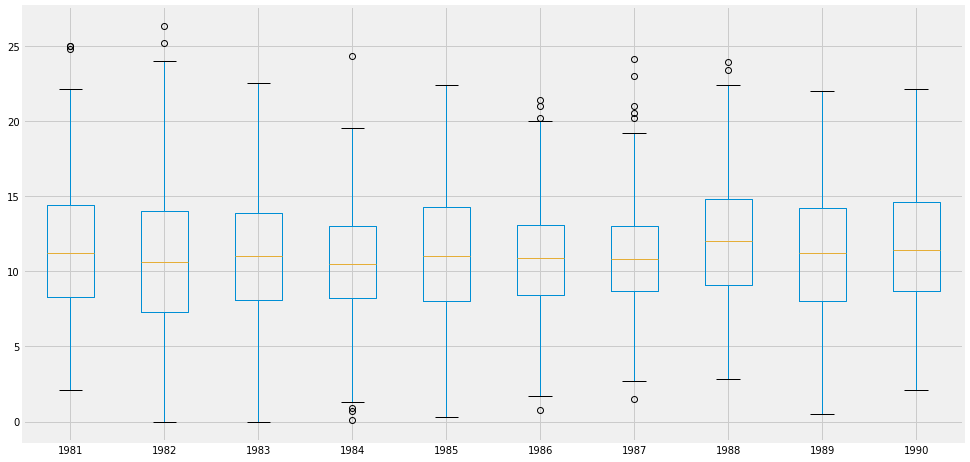

In [8]:
fig = plt.figure(figsize=(15,8))
groups = series.groupby(TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

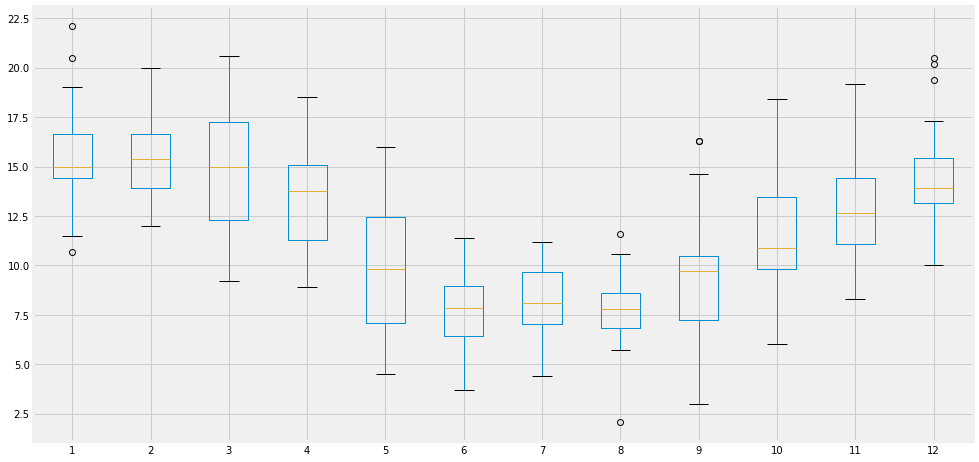

In [9]:
fig = plt.figure(figsize=(15,8))
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.show()

## 3b. Time Series Box and Whisker Plots by Day of Week

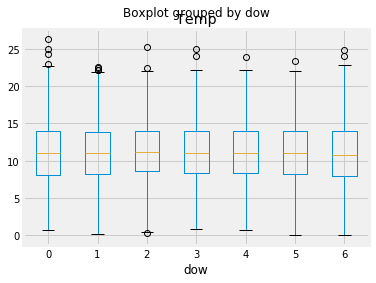

In [10]:
df = pd.DataFrame(series.transpose())
df['Date'] = pd.to_datetime(df.index)
df['dow'] = df['Date'].dt.weekday
df['day_of_week'] = df['Date'].dt.weekday_name

value_name = df.columns[0]
boxplot = df.boxplot(column=[value_name], by='dow')

## 4. Time Series Heat Maps

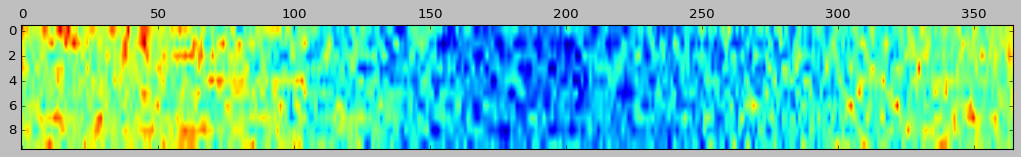

In [11]:
# better use classic to highlight this
plt.style.use('classic')

groups = series.groupby(TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

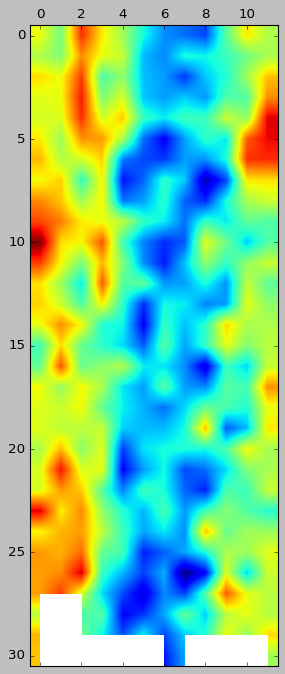

In [12]:
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

## 5. Time Series Lag Scatter Plots

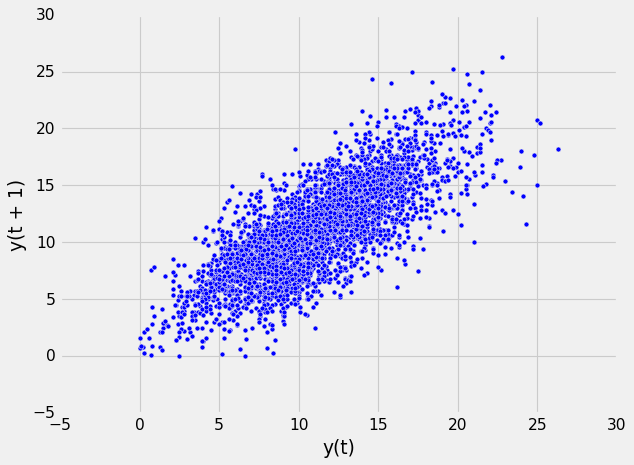

In [13]:
plt.style.use('fivethirtyeight')
# alternative from pandas.plotting import lag_plot
pd.plotting.lag_plot(series)
plt.show()

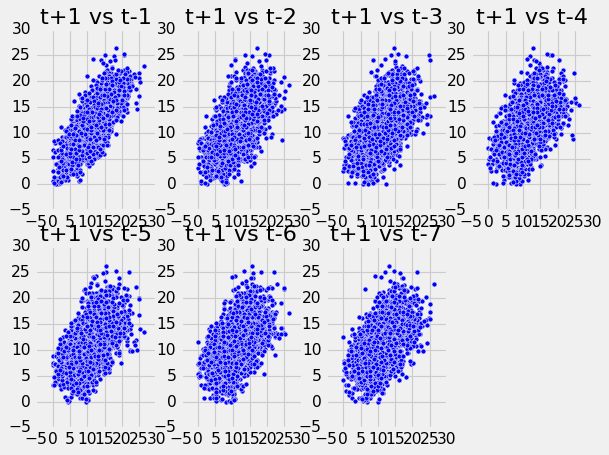

In [14]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

## 6. Time Series Autocorrelation Plots

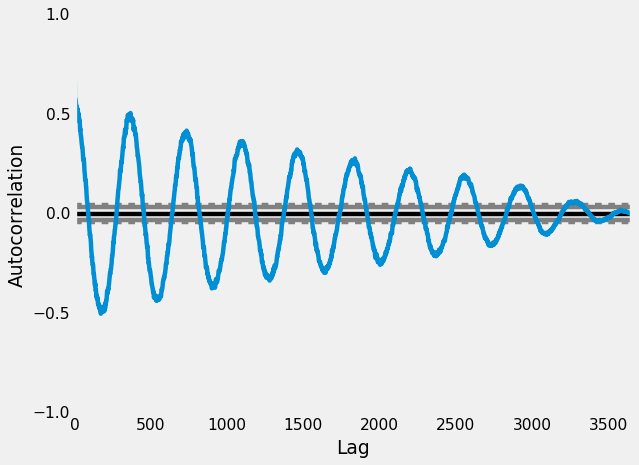

In [15]:
pd.plotting.autocorrelation_plot(series)
plt.show()

## 7. Moving Average

In [16]:
df = pd.DataFrame(series)
df['7-Day Rolling'] = df['Temp'].rolling(7, center=True).mean()
df['Monthly Rolling'] = df['Temp'].rolling(window=28, center=True, min_periods=20).mean()
print(df.tail())

            Temp  7-Day Rolling  Monthly Rolling
Date                                            
1990-12-27  14.0      13.471429              NaN
1990-12-28  13.6      13.900000              NaN
1990-12-29  13.5            NaN              NaN
1990-12-30  15.7            NaN              NaN
1990-12-31  13.0            NaN              NaN


7-Day Rolling
Monthly Rolling


Text(0, 0.5, 'Temperature')

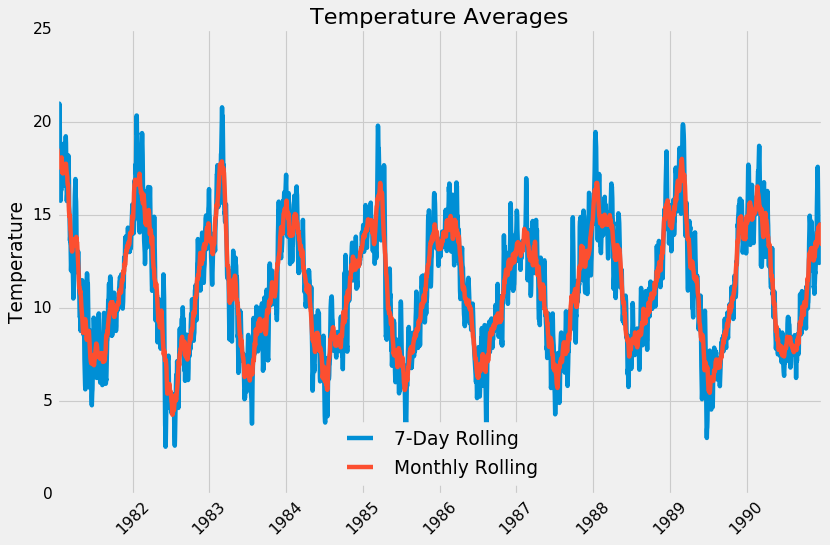

In [17]:
cols_plot = ['7-Day Rolling', 'Monthly Rolling']
fig, ax = plt.subplots(figsize=(11, 7))
for nm in cols_plot:
    ax.plot(df[nm], label=nm)
    print(nm)

ax.legend(loc='lower center')
ax.set_title("Temperature Averages")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel('Temperature')

------

## References and Further Reading
- https://machinelearningmastery.com/time-series-data-visualization-with-python/ - code primarily adapted from here
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/ - uses Open Power Systems Data with some good examples
- https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html - pandas example using sunspots data
- https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html